In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Downloads/2016_Building_Energy_Benchmarking.csv')

In [3]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [4]:
#garder uniquement NonResidential,SPS-District K-12,Nonresidential COS,Campus,Nonresidential WA
#selection avec isin
nonResidences =['NonResidential','SPS-District K-12','Nonresidential COS','Campus','Nonresidential WA']
df=df[df['BuildingType'].isin(nonResidences)]

In [5]:
#garder uniquement Compliant
df=df[df['ComplianceStatus']=='Compliant']

In [6]:
df['ComplianceStatus'].value_counts()

Compliant    1548
Name: ComplianceStatus, dtype: int64

In [7]:
dfP4=df[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','SiteEnergyUseWN(kBtu)','TotalGHGEmissions', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)']]

In [8]:
#Convertir les valeurs + en 1 et - en 0

In [9]:
#fct bi
def binaire(val) :
    if val >0 :
        return 1
    else :
        return 0

In [10]:
dfP4['Electricity(kBtu)'] = dfP4['Electricity(kBtu)'].apply(binaire)
dfP4['NaturalGas(kBtu)'] = dfP4['NaturalGas(kBtu)'].apply(binaire)
dfP4['SteamUse(kBtu)'] = dfP4['SteamUse(kBtu)'].apply(binaire)

C:\Users\User\AppData\Local\Temp\ipykernel_13780\1552152169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP4['Electricity(kBtu)'] = dfP4['Electricity(kBtu)'].apply(binaire)
C:\Users\User\AppData\Local\Temp\ipykernel_13780\1552152169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP4['NaturalGas(kBtu)'] = dfP4['NaturalGas(kBtu)'].apply(binaire)
C:\Users\User\AppData\Local\Temp\ipykernel_13780\1552152169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [11]:
def dateGap(date):
    if date >= 1900 and date < 1920 :
        return '1900 - 1919'
    elif date >= 1920 and date < 1940 :
        return '1920 - 1939'
    elif date >= 1940 and date < 1960 :
        return '1940 - 1959'
    elif date >= 1960 and date < 1980 :
        return '1960 - 1979'
    elif date >= 1980 and date < 2000 :
        return '1980 - 1999'
    elif date >= 2000 and date < 2020 :
        return '2000 - 2019'
    
    else :
        return 'autre'
    

In [12]:
dfP4['YearBuilt'] = dfP4['YearBuilt'].apply(dateGap)

C:\Users\User\AppData\Local\Temp\ipykernel_13780\3746716949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP4['YearBuilt'] = dfP4['YearBuilt'].apply(dateGap)


In [13]:
dfP4ENERGY=dfP4[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)']]

In [14]:
dfP4CO2=dfP4[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','TotalGHGEmissions', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)']]

### Traitement des Outliers

### ENERGIE

In [15]:
dfP4ENERGY.head()

,NumberofFloors,NumberofBuildings,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,12,1.0,NonResidential,Hotel,47.61220,-122.33799,1920 - 1939,88434,0,88434,Hotel,88434.0,7456910.0,1,1,1
1,11,1.0,NonResidential,Hotel,47.61317,-122.33393,1980 - 1999,103566,15064,88502,Hotel,83880.0,8664479.0,0,1,1
2,41,1.0,NonResidential,Hotel,47.61393,-122.33810,1960 - 1979,956110,196718,759392,Hotel,756493.0,73937112.0,1,1,1
3,10,1.0,NonResidential,Hotel,47.61412,-122.33664,1920 - 1939,61320,0,61320,Hotel,61320.0,6946800.5,1,1,1
4,18,1.0,NonResidential,Hotel,47.61375,-122.34047,1980 - 1999,175580,62000,113580,Hotel,123445.0,14656503.0,0,1,1


<AxesSubplot:xlabel='BuildingType', ylabel='SiteEnergyUseWN(kBtu)'>

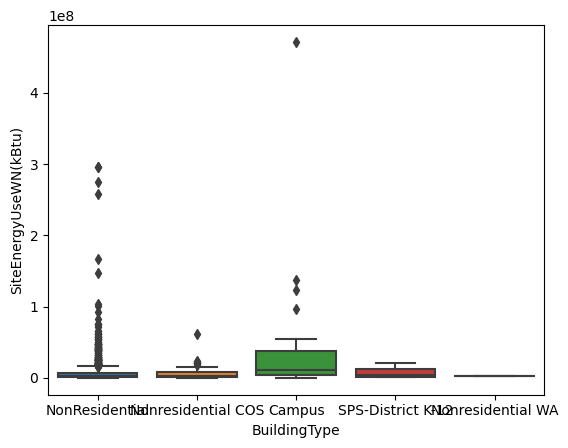

In [16]:
sns.boxplot(data=dfP4ENERGY, y='SiteEnergyUseWN(kBtu)',x='BuildingType')

In [17]:
dfP4ENERGY['SiteEnergyUseWN(kBtu)'].sort_values(ascending=False)[:10]

35      471613856.0
170     296671744.0
618     295929888.0
558     274725984.0
124     257764208.0
3264    167207104.0
167     147299056.0
340     137106112.0
1494    123205560.0
1690    103985264.0
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [18]:
dfP4ENERGY.shape

(1548, 16)

In [19]:
# suppression  de 5/1548 
dfP4ENERGY =dfP4ENERGY.loc[dfP4ENERGY['SiteEnergyUseWN(kBtu)'] < 257764208.0,: ]   

In [20]:
dfP4ENERGY.shape

(1542, 16)

<AxesSubplot:xlabel='BuildingType', ylabel='SiteEnergyUseWN(kBtu)'>

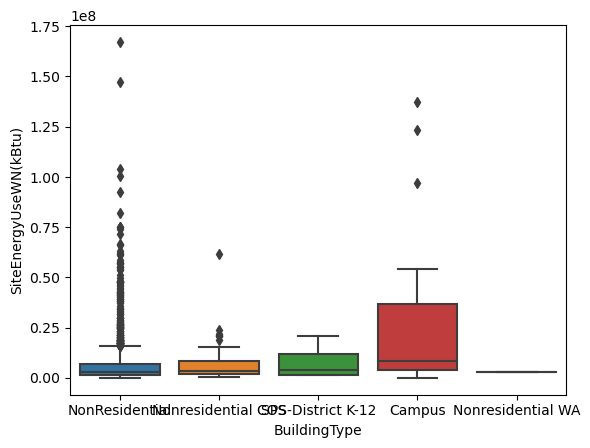

In [21]:
sns.boxplot(data=dfP4ENERGY, y='SiteEnergyUseWN(kBtu)',x='BuildingType')

In [22]:
dfP4ENERGY.isnull().sum()

NumberofFloors               0
NumberofBuildings            0
BuildingType                 0
PrimaryPropertyType          0
Latitude                     0
Longitude                    0
YearBuilt                    0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType       4
LargestPropertyUseTypeGFA    4
SiteEnergyUseWN(kBtu)        0
SteamUse(kBtu)               0
Electricity(kBtu)            0
NaturalGas(kBtu)             0
dtype: int64

In [23]:
dfP4ENERGY.dropna(axis=0, inplace=True)

In [24]:
dfP4ENERGY.isnull().sum()

NumberofFloors               0
NumberofBuildings            0
BuildingType                 0
PrimaryPropertyType          0
Latitude                     0
Longitude                    0
YearBuilt                    0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
SiteEnergyUseWN(kBtu)        0
SteamUse(kBtu)               0
Electricity(kBtu)            0
NaturalGas(kBtu)             0
dtype: int64

In [25]:
dfP4ENERGY.to_csv('P4ENERGY.csv', index=False)


### CO2

In [26]:
dfP4CO2.head()  

,NumberofFloors,NumberofBuildings,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,TotalGHGEmissions,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,12,1.0,NonResidential,Hotel,47.61220,-122.33799,1920 - 1939,88434,0,88434,Hotel,88434.0,249.98,1,1,1
1,11,1.0,NonResidential,Hotel,47.61317,-122.33393,1980 - 1999,103566,15064,88502,Hotel,83880.0,295.86,0,1,1
2,41,1.0,NonResidential,Hotel,47.61393,-122.33810,1960 - 1979,956110,196718,759392,Hotel,756493.0,2089.28,1,1,1
3,10,1.0,NonResidential,Hotel,47.61412,-122.33664,1920 - 1939,61320,0,61320,Hotel,61320.0,286.43,1,1,1
4,18,1.0,NonResidential,Hotel,47.61375,-122.34047,1980 - 1999,175580,62000,113580,Hotel,123445.0,505.01,0,1,1


<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

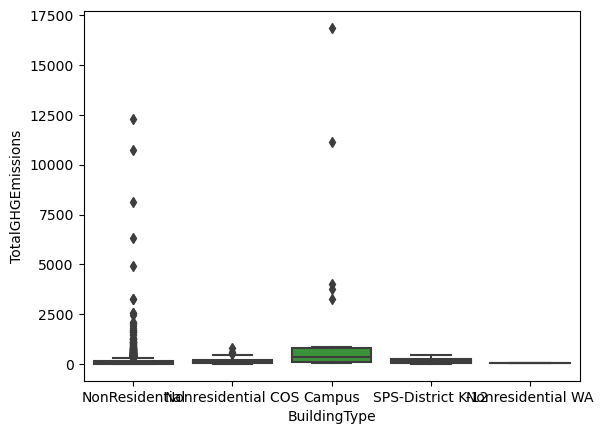

In [27]:
sns.boxplot(data=dfP4CO2, y='TotalGHGEmissions',x='BuildingType')

In [28]:
dfP4CO2['TotalGHGEmissions'].sort_values(ascending=False)[:10]

35      16870.98
618     12307.16
3274    11140.56
170     10734.57
124      8145.52
3264     6330.91
167      4906.33
340      3995.45
2325     3768.66
1672     3278.11
Name: TotalGHGEmissions, dtype: float64

In [29]:
dfP4CO2 =dfP4CO2.loc[dfP4CO2['TotalGHGEmissions'] < 10000.0,: ]   

<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

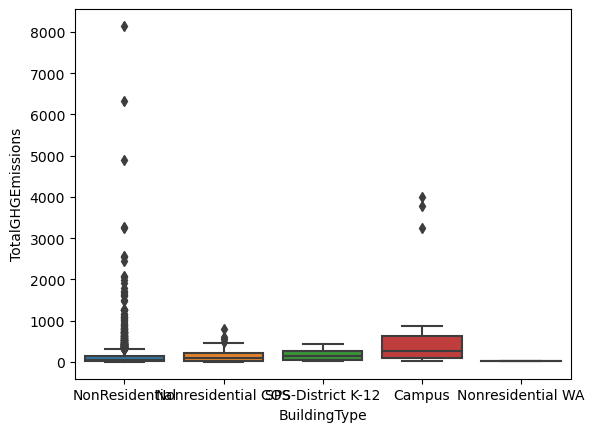

In [30]:
sns.boxplot(data=dfP4CO2, y='TotalGHGEmissions',x='BuildingType')

In [31]:
dfP4CO2.isnull().sum()

NumberofFloors               0
NumberofBuildings            0
BuildingType                 0
PrimaryPropertyType          0
Latitude                     0
Longitude                    0
YearBuilt                    0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType       4
LargestPropertyUseTypeGFA    4
TotalGHGEmissions            0
SteamUse(kBtu)               0
Electricity(kBtu)            0
NaturalGas(kBtu)             0
dtype: int64

In [32]:
dfP4CO2.dropna(axis=0, inplace=True)

In [33]:
dfP4CO2.isnull().sum()

NumberofFloors               0
NumberofBuildings            0
BuildingType                 0
PrimaryPropertyType          0
Latitude                     0
Longitude                    0
YearBuilt                    0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
TotalGHGEmissions            0
SteamUse(kBtu)               0
Electricity(kBtu)            0
NaturalGas(kBtu)             0
dtype: int64

In [34]:
dfP4CO2.to_csv('P4CO2.csv', index=False)


### ENERGY_STARSCORE

In [35]:
dfP4STAR=df[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','SiteEnergyUseWN(kBtu)','TotalGHGEmissions', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)','ENERGYSTARScore']]

In [36]:
dfP4STAR['Electricity(kBtu)'] = dfP4STAR['Electricity(kBtu)'].apply(binaire)
dfP4STAR['NaturalGas(kBtu)'] = dfP4STAR['NaturalGas(kBtu)'].apply(binaire)
dfP4STAR['SteamUse(kBtu)'] = dfP4STAR['SteamUse(kBtu)'].apply(binaire)

C:\Users\User\AppData\Local\Temp\ipykernel_13780\2790527910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP4STAR['Electricity(kBtu)'] = dfP4STAR['Electricity(kBtu)'].apply(binaire)
C:\Users\User\AppData\Local\Temp\ipykernel_13780\2790527910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP4STAR['NaturalGas(kBtu)'] = dfP4STAR['NaturalGas(kBtu)'].apply(binaire)
C:\Users\User\AppData\Local\Temp\ipykernel_13780\2790527910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [37]:
dfP4STAR['YearBuilt'] = dfP4STAR['YearBuilt'].apply(dateGap)

C:\Users\User\AppData\Local\Temp\ipykernel_13780\2899875716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP4STAR['YearBuilt'] = dfP4STAR['YearBuilt'].apply(dateGap)


In [38]:
dfP4ENERGYSTAR=dfP4STAR[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)','ENERGYSTARScore']]

<AxesSubplot:xlabel='BuildingType', ylabel='SiteEnergyUseWN(kBtu)'>

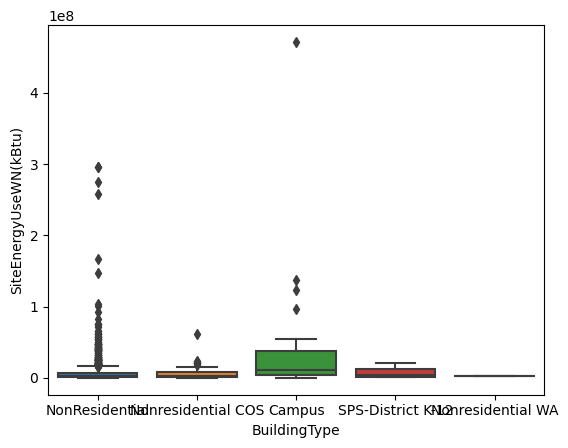

In [39]:
sns.boxplot(data=dfP4ENERGYSTAR, y='SiteEnergyUseWN(kBtu)',x='BuildingType')

In [40]:
dfP4ENERGYSTAR =dfP4ENERGYSTAR.loc[dfP4ENERGYSTAR['SiteEnergyUseWN(kBtu)'] < 257764208.0,: ]   

In [41]:
dfP4ENERGYSTAR.shape

(1542, 17)

In [42]:
dfP4ENERGYSTAR.isnull().sum()

NumberofFloors                 0
NumberofBuildings              0
BuildingType                   0
PrimaryPropertyType            0
Latitude                       0
Longitude                      0
YearBuilt                      0
PropertyGFATotal               0
PropertyGFAParking             0
PropertyGFABuilding(s)         0
LargestPropertyUseType         4
LargestPropertyUseTypeGFA      4
SiteEnergyUseWN(kBtu)          0
SteamUse(kBtu)                 0
Electricity(kBtu)              0
NaturalGas(kBtu)               0
ENERGYSTARScore              551
dtype: int64

In [43]:
dfP4ENERGYSTAR.dropna(axis=0, inplace=True)

In [44]:
dfP4ENERGYSTAR.shape

(989, 17)

In [45]:
dfP4ENERGYSTAR.to_csv('P4ENERGYSTARSCORE.csv', index=False)


### EnergyStar Score --

In [53]:
dfP4STARWT=dfP4ENERGYSTAR
dfP4STARWT.drop(['ENERGYSTARScore'], axis=1)

,NumberofFloors,NumberofBuildings,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,12,1.0,NonResidential,Hotel,47.61220,-122.33799,1920 - 1939,88434,0,88434,Hotel,88434.0,7.456910e+06,1,1,1
1,11,1.0,NonResidential,Hotel,47.61317,-122.33393,1980 - 1999,103566,15064,88502,Hotel,83880.0,8.664479e+06,0,1,1
2,41,1.0,NonResidential,Hotel,47.61393,-122.33810,1960 - 1979,956110,196718,759392,Hotel,756493.0,7.393711e+07,1,1,1
3,10,1.0,NonResidential,Hotel,47.61412,-122.33664,1920 - 1939,61320,0,61320,Hotel,61320.0,6.946800e+06,1,1,1
4,18,1.0,NonResidential,Hotel,47.61375,-122.34047,1980 - 1999,175580,62000,113580,Hotel,123445.0,1.465650e+07,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,13,1.0,Nonresidential COS,Large Office,47.62251,-122.33390,2000 - 2019,536697,197659,339038,Office,342838.0,1.403717e+07,0,1,1
3337,4,1.0,NonResidential,Hotel,47.65476,-122.34732,2000 - 2019,126823,41539,85284,Hotel,88157.0,6.042400e+06,0,1,1
3338,1,1.0,NonResidential,Warehouse,47.54425,-122.31776,1940 - 1959,52085,4222,47863,Non-Refrigerated Warehouse,52085.0,4.182622e+06,0,1,1
3339,2,1.0,NonResidential,Small- and Mid-Sized Office,47.53161,-122.29944,1920 - 1939,24990,0,24990,Office,24990.0,4.731814e+06,0,1,1


In [54]:
dfP4STARWT= dfP4STARWT.drop(['ENERGYSTARScore'], axis=1)

In [55]:
dfP4STARWT.shape

(989, 16)

In [56]:
dfP4STARWT.to_csv('P4ENERGYSTARSCOREWITHOUT.csv', index=False)

### CO2_STARSCORE

In [57]:
dfP4CO2STAR=dfP4STAR[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','TotalGHGEmissions', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)','ENERGYSTARScore']]

<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

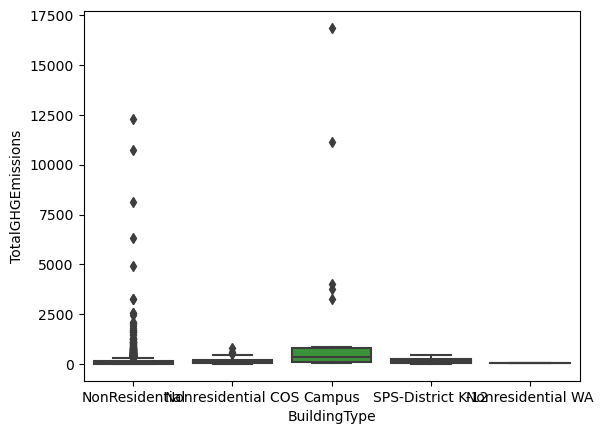

In [58]:
sns.boxplot(data=dfP4CO2STAR, y='TotalGHGEmissions',x='BuildingType')

In [59]:
dfP4CO2STAR =dfP4CO2STAR.loc[dfP4CO2STAR['TotalGHGEmissions'] < 10000.0,: ]   

In [60]:
dfP4CO2STAR.shape

(1544, 17)

In [61]:
dfP4CO2STAR.isnull().sum()

NumberofFloors                 0
NumberofBuildings              0
BuildingType                   0
PrimaryPropertyType            0
Latitude                       0
Longitude                      0
YearBuilt                      0
PropertyGFATotal               0
PropertyGFAParking             0
PropertyGFABuilding(s)         0
LargestPropertyUseType         4
LargestPropertyUseTypeGFA      4
TotalGHGEmissions              0
SteamUse(kBtu)                 0
Electricity(kBtu)              0
NaturalGas(kBtu)               0
ENERGYSTARScore              550
dtype: int64

In [62]:
dfP4CO2STAR.dropna(axis=0, inplace=True)

In [63]:
dfP4CO2STAR.shape

(992, 17)

In [64]:
dfP4CO2STAR.to_csv('P4CO2STARSCORE.csv', index=False)


### CO2 ENERGY STAR SCORE WITHOUT

In [65]:
dfP4CO2STARWT = dfP4CO2STAR

In [66]:
dfP4CO2STARWT=dfP4CO2STARWT.drop(['ENERGYSTARScore'], axis=1)

In [67]:
dfP4CO2STARWT.shape

(992, 16)

In [68]:
dfP4CO2STARWT.to_csv('P4CO2STARSCOREWITHOUT.csv', index=False)
